In [22]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

: 오디오 feature를 뉴럴넷의 인풋으로 받아서 Annotation을 예측하는 모델
 
데이터 : http://mirg.city.ac.uk/codeapps/the-magnatagatune-dataset
 
1. (음악 파일 : annotation)이 대응되도록 preprocessing
1. mp3 데이터에서 MFCC 등 여러 feature를(자유롭게 시도) input으로 설정해서 뉴럴넷의 dimension을 정함.
1. 데이터 셋을 train / validation으로 나누어서 학습/테스트를 진행
 
(optional) tensorboard로 시각화하시오.


# Create input/label from mp3 files & annotations

In [1]:
import pandas as pd

annotationsDF = pd.read_csv('magnatagatune/annotations_final.csv', sep='\t')

annotationsDF

,clip_id,no voice,singer,duet,plucking,hard rock,world,bongos,harpsichord,female singing,...,rap,metal,hip hop,quick,water,baroque,women,fiddle,english,mp3_path
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,f/american_bach_soloists-j_s__bach_solo_cantat...
1,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,f/american_bach_soloists-j_s__bach_solo_cantat...
2,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,f/american_bach_soloists-j_s__bach_solo_cantat...
3,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,f/american_bach_soloists-j_s__bach_solo_cantat...
4,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,f/american_bach_soloists-j_s__bach_solo_cantat...
5,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,c/lvx_nova-lvx_nova-01-contimune-30-59.mp3
6,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,c/lvx_nova-lvx_nova-01-contimune-175-204.mp3
7,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,c/lvx_nova-lvx_nova-01-contimune-233-262.mp3
8,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,c/lvx_nova-lvx_nova-01-contimune-291-320.mp3
9,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0/american_bach_soloists-j_s__bach__cantatas_v...


In [3]:
import numpy as np
import librosa
print(librosa.__version__)

x_input = annotationsDF[['clip_id', 'mp3_path']]

def getAudioFeature(x):
    path = 'magnatagatune/rawdata/'
    mp3_path = x
    y, sr = librosa.load(path + mp3_path)
    chroma_cq = librosa.feature.chroma_cqt(y=y, sr=sr)
    return pd.Series({'sample_rate':sr, 'size': len(y), 'chroma_cq': np.reshape(chroma_cq, -1)})

audioFeature = x_input.head(1000)['mp3_path'].apply(getAudioFeature)
audioFeature

0.5.1


,chroma_cq,sample_rate,size
0,"[1.0, 1.0, 0.764978002713, 0.631380542009, 0.5...",22050,642185
1,"[0.97395149457, 0.97514243421, 0.741913926953,...",22050,642185
2,"[0.585128503805, 0.512431722696, 0.20337018537...",22050,642185
3,"[0.350383469311, 0.585681176328, 0.37796873554...",22050,642185
4,"[0.56626093275, 0.733517855343, 0.4816361871, ...",22050,642185
5,"[0.199973255291, 0.179849358881, 0.22597325420...",22050,642185
6,"[0.590389488049, 0.597815207626, 0.50319228400...",22050,642185
7,"[0.731226478002, 0.684352097888, 0.57926067452...",22050,642185
8,"[0.614010676187, 0.594796481935, 0.54047985484...",22050,642185
9,"[0.285231235557, 0.093947562815, 0.14058583766...",22050,642185


In [59]:
audioFeature['chroma_cq'][0]

array([ 1.        ,  1.        ,  0.764978  , ...,  0.41147135,
        0.2091263 ,  0.24531859])

In [4]:
x_feature = audioFeature['chroma_cq'].values
x_feature = np.concatenate(x_feature, axis=0).reshape(1000, -1)

print(x_feature.shape)
x_feature

(1000, 15060)


array([[ 1.        ,  1.        ,  0.764978  , ...,  0.41147135,
         0.2091263 ,  0.24531859],
       [ 0.97395149,  0.97514243,  0.74191393, ...,  0.95942857,
         0.50079051,  0.20492196],
       [ 0.5851285 ,  0.51243172,  0.20337019, ...,  0.44907091,
         0.45436316,  0.45131335],
       ..., 
       [ 0.88462763,  0.68751565,  0.65345059, ...,  0.41852152,
         0.44300997,  0.39095831],
       [ 1.        ,  1.        ,  1.        , ...,  0.45678236,
         0.31168931,  0.25352528],
       [ 0.57362055,  0.76393478,  0.74246708, ...,  0.34629253,
         0.37212816,  0.47318845]])

In [8]:
y_labels = annotationsDF.drop(['clip_id', 'mp3_path'], axis=1)
y_labels

# for col in y_labels:
#     print(col, y_labels[col].value_counts())

y = y_labels.values[:1000]
print(y.shape)
y

(1000, 188)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# dataset

1.dataset: read 1000 mp3 files
    - X: x_feature, chromagram data
    - Y: y, annotation labels(not one-hot)
1. training: 80% of dataset
    - x_train: 
    - y_train
1. testing: 20% of dataset
    - x_test
    - y_test

In [9]:
print(y.shape, x_feature.shape)

x_train = x_feature[:800]
x_test = x_feature[800:]

y_train = y[:800]
y_test = y[800:]

(1000, 188) (1000, 15060)


# Learning

based on: https://github.com/hunkim/DeepLearningZeroToAll/blob/master/lab-10-5-mnist_nn_dropout.py

1. Params:
    - x_dim: dimension of training vector
    - y_dim: dimension of output vector
    - layerSize: 2048, hidden layer size
    - batch_size: 50
    - training_epochs: 100
    - learning_rate: 0.001
1. Layers:
    - input: x_dim * layerSize, relu, dropout
    - L1: layerSize * layerSize, relu, dropout
    - L2: layerSize * layerSize, relu, dropout
    - L3: layerSize * layerSize, relu, dropout
    - L4: layerSize * layerSize, relu, dropout
    - output : layerSize * y_dim
1. Optimization:
    - loss: tf.nn.sigmoid_cross_entropy_with_logits
    - optimizer: Adam

In [82]:
import tensorflow as tf
import random

x_dim = int(x_feature[0].shape[0])
y_dim = int(y[0].shape[0])

size_train = len(x_train)
size_test = len(x_test)

print(x_dim, y_dim, size_train, size_test)

# parameters
learning_rate = 0.001
training_epochs = 100
batch_size = 50

layerSize = 2048

tf.reset_default_graph()

# input place holders
X = tf.placeholder(tf.float32, [None, x_dim])
Y = tf.placeholder(tf.float32, [None, y_dim])

# dropout (keep_prob) rate  0.7 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32)

# weights & bias for nn layers
# http://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow
W1 = tf.get_variable("W1", shape=[x_dim, layerSize], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([layerSize]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

W2 = tf.get_variable("W2", shape=[layerSize, layerSize],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([layerSize]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

W3 = tf.get_variable("W3", shape=[layerSize, layerSize],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([layerSize]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)

W4 = tf.get_variable("W4", shape=[layerSize, layerSize],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([layerSize]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

W5 = tf.get_variable("W5", shape=[layerSize, y_dim],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([y_dim]))
hypothesis = tf.matmul(L4, W5) + b5

# define cost/loss & optimizer
'''
To classify with multi-label:
    use tf.nn.sigmoid_cross_entropy_with_logits

REF:
    https://medium.com/towards-data-science/multi-label-image-classification-with-inception-net-cbb2ee538e30
    https://stackoverflow.com/questions/35400065/multilabel-text-classification-using-tensorflow
'''
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(size_train / batch_size)

    for i in range(total_batch):
        batch_xs = x_train[i*batch_size: (i+1)*batch_size]
        batch_ys = y_train[i*batch_size: (i+1)*batch_size]
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
    if epoch % 10 == 0:
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
print('Learning Finished!')

# Test model and check accuracy
'''
To compare multi-label:
    X_pred = round(sigmoid(pred))
    Y_pred = round(Y)

REF:
    https://stackoverflow.com/questions/37746670/tensorflow-multi-label-accuracy-calculation
'''
# result of NN: convert into sigmoid and round
pred = tf.nn.sigmoid(hypothesis)

# compare with rounding pred
correct_prediction = tf.equal(tf.round(pred), tf.round(Y))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print('Accuracy:', sess.run(accuracy, feed_dict={
      X: x_test, Y: y_test, keep_prob: 1}))


15060 188 800 200
Epoch: 0001 cost = 0.227408790
Epoch: 0011 cost = 0.079011213
Epoch: 0021 cost = 0.077829620
Epoch: 0031 cost = 0.074809445
Epoch: 0041 cost = 0.073582572
Epoch: 0051 cost = 0.069924338
Epoch: 0061 cost = 0.068415903
Epoch: 0071 cost = 0.068450722
Epoch: 0081 cost = 0.069913540
Epoch: 0091 cost = 0.069550191
Learning Finished!
Accuracy: 0.982128


## chromagram example from librosa

0.5.1
magnatagatune/rawdata/f/american_bach_soloists-j_s__bach_solo_cantatas-01-bwv54__i_aria-30-59.mp3
642185


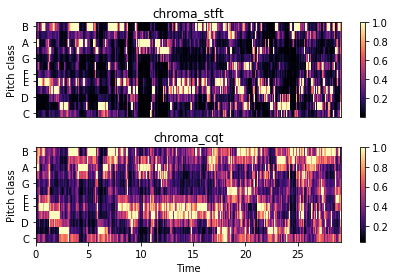

In [9]:
%matplotlib inline

import librosa
import librosa.display

import matplotlib.pyplot as plt
print(librosa.__version__)
path = 'magnatagatune/rawdata/'

for idx, mp3_path in enumerate(annotationsDF['mp3_path']):
#     mp3_path = annotationsDF['mp3_path'][
    print(path + mp3_path)
    y, sr = librosa.load(path + mp3_path)

    print(len(y))
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=12, n_fft=4096)
    chroma_cq = librosa.feature.chroma_cqt(y=y, sr=sr)
    
    plt.figure()
    plt.subplot(2,1,1)
    librosa.display.specshow(chroma_stft, y_axis='chroma')
    plt.title('chroma_stft')
    plt.colorbar()
    plt.subplot(2,1,2)
    librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time')
    plt.title('chroma_cqt')
    plt.colorbar()
    plt.tight_layout()
    break